In [ ]:
import tensorflow_datasets as tfds

data, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

tokenizer = info.features['text'].encoder

In [ ]:
BUFFER_SIZE=10000
BATCH_SIZE=256

train_data, test_data = data['train'], data['test']

train_data = train_data.shuffle(BUFFER_SIZE)

train_dataset = train_data.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [ ]:
import tensorflow as tf

embedding_dim = 64
dense_dim=64
lstm_dim=64

model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
        tf.keras.layers.Dense(dense_dim, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')                           
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 10

history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 94s 906ms/step - loss: 0.6436 - accuracy: 0.6256 - val_loss: 0.5217 - val_accuracy: 0.7409
Epoch 2/10
98/98 [==============================] - 88s 897ms/step - loss: 0.3476 - accuracy: 0.8568 - val_loss: 0.3995 - val_accuracy: 0.8225
Epoch 3/10
98/98 [==============================] - 88s 899ms/step - loss: 0.2525 - accuracy: 0.9062 - val_loss: 0.3833 - val_accuracy: 0.8491
Epoch 4/10
98/98 [==============================] - 88s 897ms/step - loss: 0.2252 - accuracy: 0.9167 - val_loss: 0.4007 - val_accuracy: 0.8436
Epoch 5/10
98/98 [==============================] - 88s 893ms/step - loss: 0.1929 - accuracy: 0.9310 - val_loss: 0.4220 - val_accuracy: 0.8350
Epoch 6/10
98/98 [==============================] - 88s 894ms/step - loss: 0.1513 - accuracy: 0.9490 - val_loss: 0.4747 - val_accuracy: 0.8464
Epoch 7/10
98/98 [==============================] - 87s 887ms/step - loss: 0.1228 - accuracy: 0.9592 - val_loss: 0.5367 - val_accuracy: 0.8375

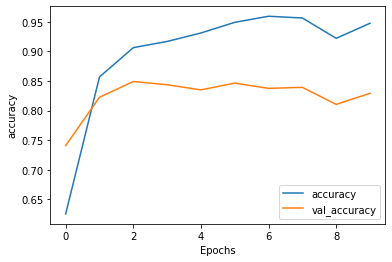

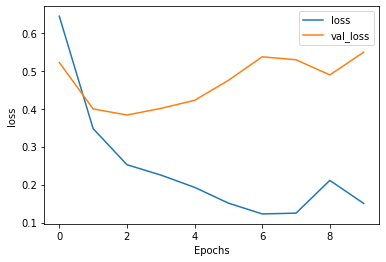

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")